### 데이터를 다룰 때에는 데이터를 다루기 위해 만들어진 라이브러리를 사용하는 것이 좋음
#### pima indian 데이터 다루기

###  데이터 조사하기

In [2]:
import pandas as pd
df = pd.read_csv('./pima-indians-diabetes.csv',names = ["pregnant","plasma","pressure","thickness",
                                                        "insulin","BMI","pedigree","age","class"])

In [3]:
# 불러온 데이터의 내용을 간단히 확인
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [4]:
# 데이터의 전반적인 정보 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
# 정보별 특징을 좀 더 자세히 알고 싶으면 describe() 함수를 이용
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [6]:
# 임신 횟수(pregnant)와 당뇨병(class) 발생 여부만 확인하고 싶을 때
print(df[["pregnant","class"]])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


### 데이터 가공하기 

In [12]:
# 임신횟수와 당뇨병 발병 확률
print(df[["pregnant","class"]].groupby(["pregnant"],as_index=False).mean().sort_values(by="pregnant",ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


###  matplotlib를 이용해 그래프로 표현

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# 그래프의 크기를 결정
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

#### seaborn 라이브러리 중 각 항목간의 상관관계를 나타내 주는 heatmap 함수
##### heatmap 함수는 두 항목씩 짝을 지은 뒤 각각 어떤 패턴으로 변화하는지를 관찰하는 함수
##### 두 항목이 전혀 다른 패턴으로 변화하고 있으면 0 을 서로 비슷한 패턴으로 변할수록 1에 가까운 값을 출력

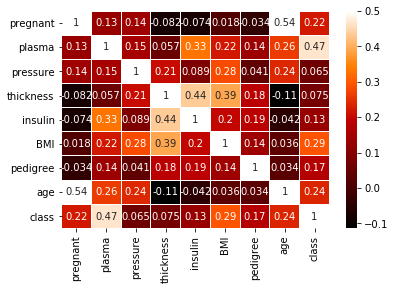

In [19]:
# vamx는 색상의 밝기를 조절하는 인자
# cmap은 미리 정해진 matplotlib 색상의 설정값을 불러옴

sns.heatmap(df.corr(),linewidths=0.1, vmax=0.5,cmap=plt.cm.gist_heat,linecolor="white",annot=True)

#### class 항목을 보면 pregnant부터 age까지 상관도가 숫자로 표시되어 있음
#### 숫자가 높을 수록 밝은 색상으로 채워져 있음
#### 그래프를 확인해보니 plasma가 class항목과 가장 상관 관계가 높다는 것을 알 수 있음

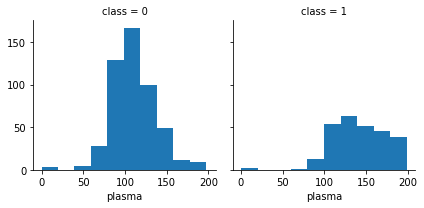

In [20]:
# plasma와 class 항목만 따로 떼어 두 항목간의 관계를 그래프로 다시 확인
grid = sns.FacetGrid(df, col="class")
grid.map(plt.hist,"plasma",bins=10)
plt.show()

#### 이 그래프를 통해 당뇨병 환자(class=1)인 경우 plasma 항목의 수치가 150이상인 경우가 많다는 것을 알 수 있음

### 피마 인디언의 당뇨병 예측 실행

In [23]:
# seed 값 생성
import numpy
import tensorflow as tf
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

C:\Users\KANGSUNGHO\Anaconda3\envs\deep\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\KANGSUNGHO\Anaconda3\envs\deep\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\KANGSUNGHO\Anaconda3\envs\deep\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\KANGSUNGHO\Anaconda3\envs\deep\lib\site-packages\ten

In [27]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12,input_dim=8, activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.
